In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
 

In [39]:
x0 = 15
n = 25
p = 0.3
steps = 99999

x = np.zeros(steps+1,dtype=int)
x[0] = int(x0)
print(type(x0))


for t in range(steps):
    proposed = int((round(np.random.random())*2 - 1) + x[t]) # this is ~40% faster than below due to no if checks
    #step = np.random.random()
    #if step >0.5:
    #    proposed = 1 + x[t]
    #else:
    #    proposed = -1 + x[t]

    if proposed > n: # need this so that it doesn't step out of bounds 
        proposed = n 
    if proposed < 0: # same as above
        proposed = 0
    
    proposed_dist = math.factorial(n)/(math.factorial(n - proposed)*math.factorial(proposed))*p**proposed*(1-p)**(n-proposed)
    test_dist = math.factorial(n)/(math.factorial(n - x[t])*math.factorial(x[t]))*p**x[t]*(1-p)**(n-x[t])
    r = proposed_dist/test_dist

    if r >= 1:
        x[t+1] = int(proposed)

    if r < 1:
        U = np.random.random()
        if U <= r:
            x[t+1] = int(proposed)
        else:
            x[t+1] = int(x[t])





<class 'int'>


Text(0, 0.5, 'P(k|25 rolls)')

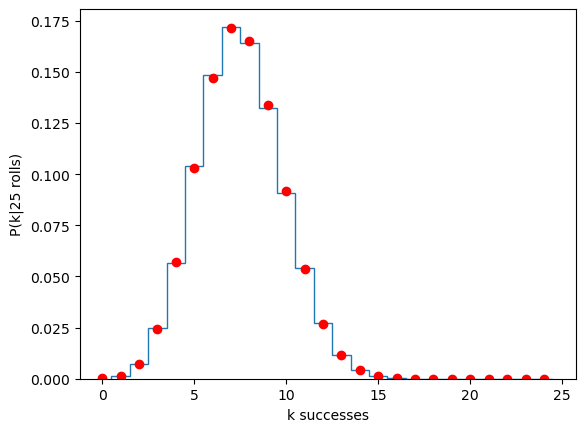

In [41]:
hist, bin_edges = np.histogram(x,bins=np.arange(0.5,n,1))
plt.stairs(hist/len(x),bin_edges)
plt.scatter(np.arange(0,n),stats.binom.pmf(np.arange(0,n),n,p),color='r')
plt.xlabel("k successes")
plt.ylabel("P(k|25 rolls)")

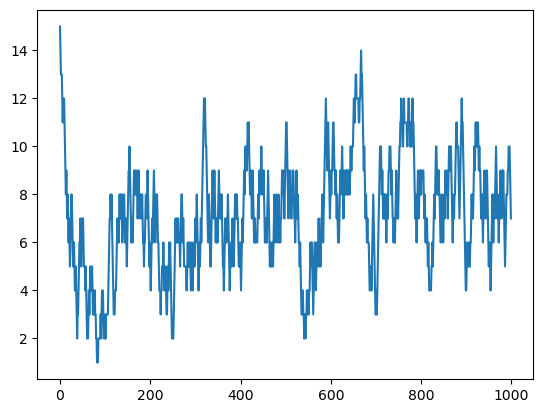

In [42]:
plt.plot(x[:1000])